Họ Và Tên: Bùi Thị Thanh Phương
MSSV: 20110280

# 3. Đây là dữ liệu được quan sát giữa các thông tin của người nợ tiền và khoản tiền nợ của họ.
a) Hãy vẽ hình thể hiện mối liên hệ giữa khoản tiền nợ (LoanAmount) và thu nhập của người nợ (ApplicantIncome).
b) Từ dữ liệu được trích xuất ở câu trên, hãy dùng k-Means clustering để phân thành 3 cụm và vẽ hình biểu diễn.
c) Từ dữ liệu được trích xuất ở câu trên, hãy dùng density-based spatial clustering of applications with noise
(DBSCAN) để phân cụm và vẽ hình biểu diễn.
d) Hãy đưa ra nhận xét, so sánh giữa k-Means và DBSCAN.

In [15]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [4]:
image = pd.read_csv("/content/clustering.csv")

In [5]:
image.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [6]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [9]:
#Chuyển đổi kiểu dữ liệu
image['ApplicantIncome'] = image['ApplicantIncome'].astype('float')
print(image['ApplicantIncome'].dtype)

float64


Hãy vẽ hình thể hiện mối liên hệ giữa khoản tiền nợ (LoanAmount) và thu nhập của người nợ (ApplicantIncome).

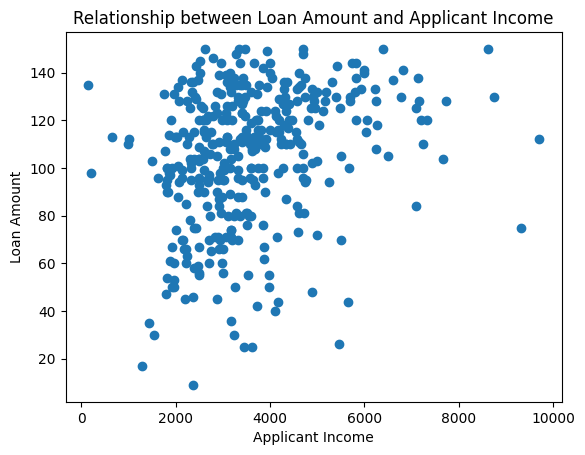

In [10]:
# Vẽ biểu đồ phân tán
plt.scatter(image['ApplicantIncome'], image['LoanAmount'])
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('Relationship between Loan Amount and Applicant Income')
plt.show()

Tích 2 dữ liệu trên ra

In [11]:
df = image[['ApplicantIncome', 'LoanAmount']]
df.head

<bound method NDFrame.head of      ApplicantIncome  LoanAmount
0             4583.0       128.0
1             3000.0        66.0
2             2583.0       120.0
3             6000.0       141.0
4             2333.0        95.0
..               ...         ...
376           5703.0       128.0
377           3232.0       108.0
378           2900.0        71.0
379           4106.0        40.0
380           4583.0       133.0

[381 rows x 2 columns]>

b) Từ dữ liệu được trích xuất ở câu trên, hãy dùng k-Means clustering để phân thành 3 cụm và vẽ hình biểu diễn.

In [12]:
# Áp dụng phương pháp KMeans với số cụm là 3
kmeans = KMeans(n_clusters=3).fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
# Lấy thông tin về các cụm
labels = kmeans.labels_

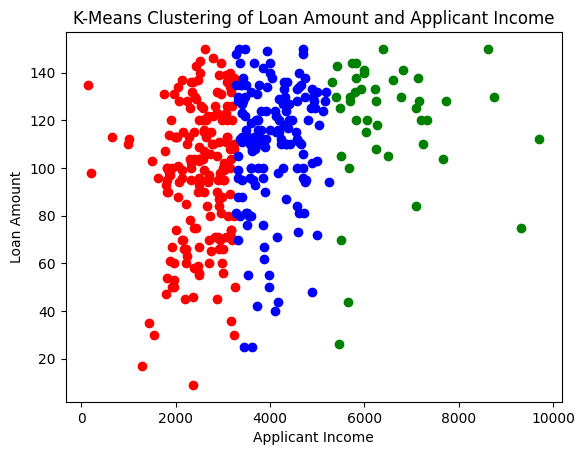

In [14]:
# Vẽ biểu đồ
plt.scatter(df['ApplicantIncome'][labels==0], df['LoanAmount'][labels==0], color='red')
plt.scatter(df['ApplicantIncome'][labels==1], df['LoanAmount'][labels==1], color='blue')
plt.scatter(df['ApplicantIncome'][labels==2], df['LoanAmount'][labels==2], color='green')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('K-Means Clustering of Loan Amount and Applicant Income')
plt.show()

c) Từ dữ liệu được trích xuất ở câu trên, hãy dùng density-based spatial clustering of applications with noise
(DBSCAN) để phân cụm và vẽ hình biểu diễn.

In [16]:
# Áp dụng phương pháp DBSCAN với các tham số mặc định
dbscan = DBSCAN().fit(df)

In [17]:
# Lấy thông tin về các cụm
labels = dbscan.labels_

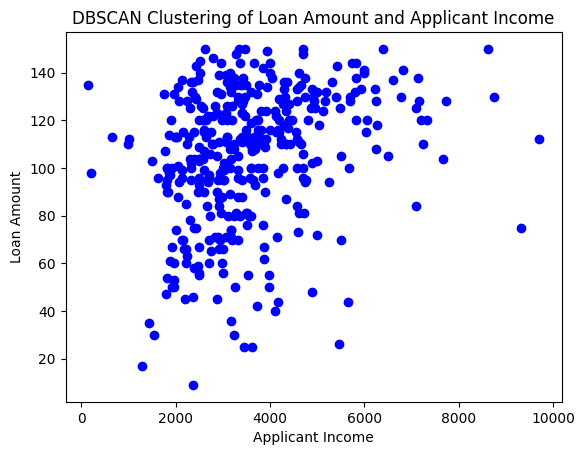

In [18]:
# Vẽ biểu đồ
plt.scatter(df['ApplicantIncome'][labels==-1], df['LoanAmount'][labels==-1], color='blue')
plt.scatter(df['ApplicantIncome'][labels==0], df['LoanAmount'][labels==0], color='red')
plt.scatter(df['ApplicantIncome'][labels==1], df['LoanAmount'][labels==1], color='black')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.title('DBSCAN Clustering of Loan Amount and Applicant Income')
plt.show()

# C. Hãy đưa ra nhận xét, so sánh giữa k-Means và DBSCAN.

- k-Means là một phương pháp phân cụm dựa trên trung tâm (centroid-based clustering), trong đó các điểm dữ liệu được gán vào các cụm (cluster) dựa trên khoảng cách đến trung tâm của các cụm. Phương pháp này yêu cầu phải xác định trước số lượng cụm cần tạo ra và các trung tâm ban đầu của các cụm, và sau đó sử dụng thuật toán lặp để cập nhật các trung tâm và gán các điểm dữ liệu vào các cụm cho đến khi thuật toán hội tụ. k-Means thường được sử dụng để phân cụm dữ liệu có số chiều thấp, và có thể áp dụng cho các bài toán phân loại và nén dữ liệu.

- DBSCAN là một phương pháp phân cụm dựa trên mật độ (density-based clustering), trong đó các điểm dữ liệu được gán vào các cụm dựa trên mật độ của các điểm xung quanh chúng. Phương pháp này không yêu cầu xác định trước số lượng cụm, mà tự động xác định các cụm dựa trên mật độ của các điểm dữ liệu. Các điểm dữ liệu có mật độ cao hơn ngưỡng được xem là thuộc vào cùng một cụm, và các cụm được tạo ra bằng cách kết nối các điểm dữ liệu có mật độ cao hơn ngưỡng với nhau. DBSCAN thường được sử dụng để phân cụm dữ liệu có số chiều cao, nhiễu và các cụm có kích thước và hình dạng khác nhau.-